In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)


In [8]:
max_length = 500 # Maximum length of each review
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


In [10]:
#define the model
model=keras.Sequential([
    layers.Embedding(10000, 16, input_length=max_length),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')

])

C:\Users\VAISHANAVI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
#train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5105 - loss: 0.6929 - val_accuracy: 0.5982 - val_loss: 0.6890
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5921 - loss: 0.6862 - val_accuracy: 0.5581 - val_loss: 0.6796
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6148 - loss: 0.6692 - val_accuracy: 0.7161 - val_loss: 0.6490
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7133 - loss: 0.6359 - val_accuracy: 0.7022 - val_loss: 0.6115
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7616 - loss: 0.5895 - val_accuracy: 0.7366 - val_loss: 0.5627
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7754 - loss: 0.5360 - val_accuracy: 0.7886 - val_loss: 0.5087
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8188 - loss: 0.4821 - val_accuracy: 0.8296 - val_loss: 0.4603
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8412 - loss: 0.4327 - val_accuracy: 0.8394 - v

782/782 - 1s - 1ms/step - accuracy: 0.8367 - loss: 0.3901

Test accuracy: {test_acc:.4f}


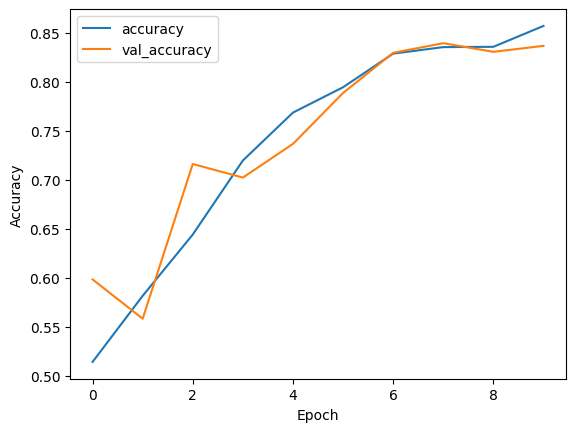

In [13]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy: {test_acc:.4f}')
#plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()